<a href="https://colab.research.google.com/github/Descartess/DeepLearning/blob/master/IMDB-Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading the data

replace the load function from numpy so that the default value for `allow_pickle=True`
this is achieved using lambdas think closures in swift

In [0]:
from keras.datasets import imdb
import numpy as np

np_load_old = np.load

np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

np.load = np_load_old


max([max(sequence) for sequence in train_data])

Using TensorFlow backend.


9999

### Preparing the data



```
Using one hot encoding to prepare the data. manual method below
```



In [0]:
def vectorise_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Using the numpy method to do one hot encoding

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the network

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

models = models.Sequential()
models.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
models.add(layers.Dense(16,activation='relu'))
models.add(layers.Dense(1,activation='sigmoid'))


models.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])



W0822 12:07:36.858458 139825981867904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 12:07:36.877177 139825981867904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 12:07:36.879958 139825981867904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 12:07:36.963769 139825981867904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 12:07:36.972059 139825981867904 deprecation_wrappe

### Training the model

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history = models.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

W0822 12:07:37.213568 139825981867904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.5048 - binary_accuracy: 0.7871 - val_loss: 0.3775 - val_binary_accuracy: 0.8703
Epoch 2/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.2992 - binary_accuracy: 0.9046 - val_loss: 0.3001 - val_binary_accuracy: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.2173 - binary_accuracy: 0.9284 - val_loss: 0.3081 - val_binary_accuracy: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1747 - binary_accuracy: 0.9439 - val_loss: 0.2826 - val_binary_accuracy: 0.8842
Epoch 5/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1422 - binary_accuracy: 0.9541 - val_loss: 0.2855 - val_binary_accuracy: 0.8858
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1147 - binary_accuracy: 0.9652 - val_loss: 0.3146 - val_bi

### Validating our approach

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

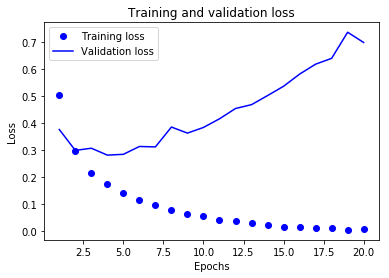

In [0]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
training_accuracy = history_dict['binary_accuracy']
validation_accuracy = history_dict['val_binary_accuracy']

epochs = range(1, len(training_accuracy)+1)

plt.plot(epochs, loss_values,'bo',label='Training loss')
plt.plot(epochs, val_loss_values,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

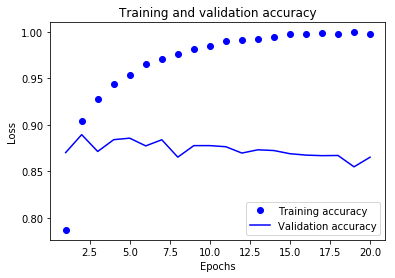

In [0]:
plt.plot(epochs, training_accuracy,'bo',label='Training accuracy')
plt.plot(epochs, validation_accuracy,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()